# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [152]:
# Import your libraries
from scipy import stats
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [33]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000])

dists = sample_size.apply(lambda x: np.random.normal(mu, sigma, x))

tests = dists.apply(lambda x: stats.normaltest(x))

tests

0    (4.276559304316886, 0.11785742448234639)
1     (1.582932411825806, 0.4531798529502844)
2    (1.932590417983937, 0.38049006629761856)
3    (4.341272119827716, 0.11410501619730916)
dtype: object

#### Interpret the normaltest results and make your observations.

The first return of the Normaltest:
*statistic : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.*
Skewtest:

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

And Kurtosistest:

High value of k means that the bell has a central peak, negative values of k means that it has a spreaded bell.

*pvalue : float or array
A 2-sided chi squared probability for the hypothesis test.*

High values means that it's more normal distributed in mu and sigma.



#### Step 2: Plot normal distributions

Use matplotlib to plot a histogram of each sample. 

*Hints:*

- Your outputs should look like below:

![normal distributions with different sample sizes](ch-1.png)

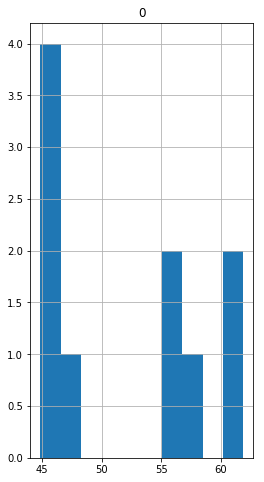

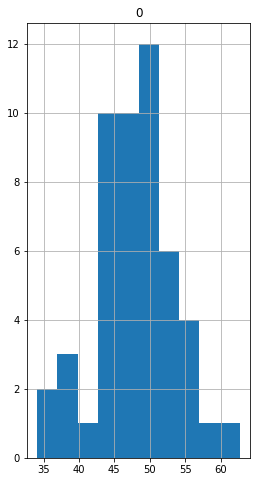

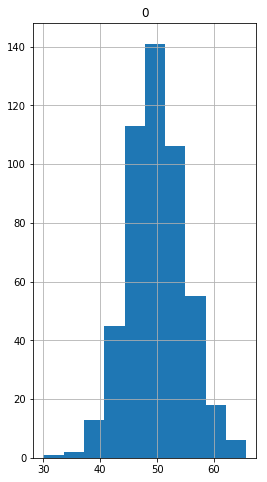

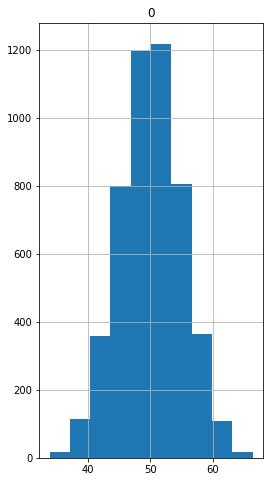

In [47]:
for i in range(4):
    pd.DataFrame(dists[i]).hist(figsize=(4,8))

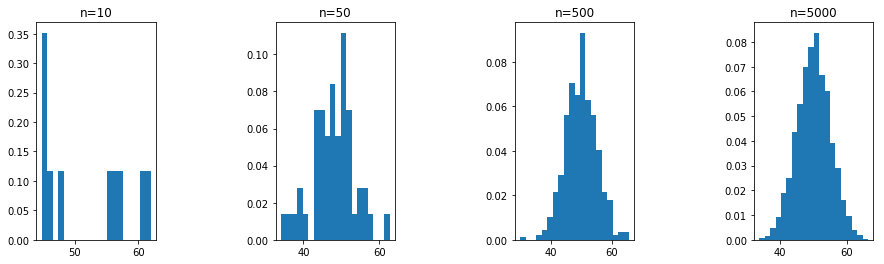

In [36]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title(f'n={sample_size[i]}')
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
"""When sample_population is higher, the plot is more likely to be similar to theorical normal plot"""

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

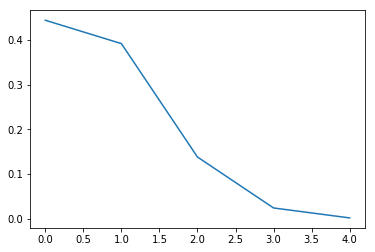

In [62]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
#The probability of watching the ad is going down when less people still needs to watch the video

#### Now plot PMP with 50, 500, and 5000 visitors.

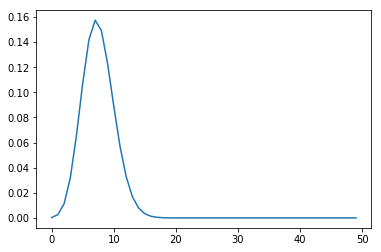

In [83]:
# Your code here
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

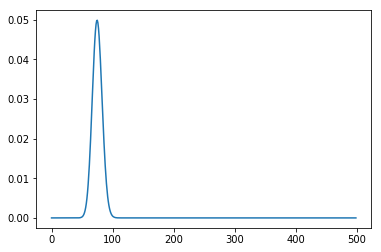

In [84]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

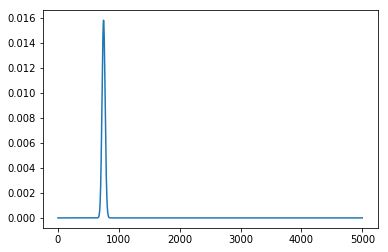

In [85]:
n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [86]:
# Your comment here
#When n is higher the spike is less spreaded

# Challenge 3

#### Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
#Expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [102]:
# Your code here
mu = 300
stats.poisson.pmf(320,mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [105]:
# Your code here
stats.poisson.pmf(60,mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

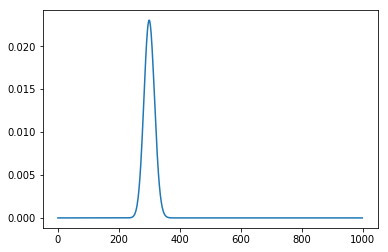

In [106]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)

# Challenge 4 - Central Limit Theorem

#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [164]:
# Your answer here

print(0.5 - stats.norm.cdf(30, 35, 8/sqrt(200)))

0.5


#### b. What is the probablity that in total, it takes more than 115 hours to deliver all 200 packages?

In [163]:
# Your answer here
